# **NHÓM 10**


# **Bước 1: Cài đặt môi trường và tải dữ liệu**

In [ ]:
# Import các thư viện cần thiết
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import numpy as np
import seaborn as sns
import csv


# Tải bộ dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chia tập train thành tập train và validation
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# In ra số lượng dữ liệu của từng tập
print(f"Số lượng mẫu trong tập train: {len(x_train)}")
print(f"Số lượng mẫu trong tập validation: {len(x_val)}")
print(f"Số lượng mẫu trong tập test: {len(x_test)}")

# Chuẩn hóa dữ liệu
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_val = x_val.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encoding cho nhãn
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step
Số lượng mẫu trong tập train: 50000
Số lượng mẫu trong tập validation: 10000
Số lượng mẫu trong tập test: 10000


# **Bước 2: Xây dựng và compile mô hình neural network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer

model = Sequential()

# Lớp convolutional và pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten và các lớp fully connected
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# **Bước 3: Huấn luyện mô hình**

In [ ]:
# Huấn luyện mô hình với early stopping và giảm tốc độ học khi dừng cải thiện
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

#history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping, reduce_lr])
history = model.fit(x_train, y_train,batch_size=64, epochs=50, validation_data=(x_val, y_val), callbacks=[reduce_lr])


Epoch 1/50
782/782 [==============================] - 16s 7ms/step - loss: 0.2383 - accuracy: 0.9279 - val_loss: 0.0784 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0912 - accuracy: 0.9714 - val_loss: 0.0425 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 0.0730 - accuracy: 0.9777 - val_loss: 0.0351 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0380 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0325 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0394 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 4s 6ms/step - l

# **Bước 4: Vẽ đồ thị accuracy và loss**

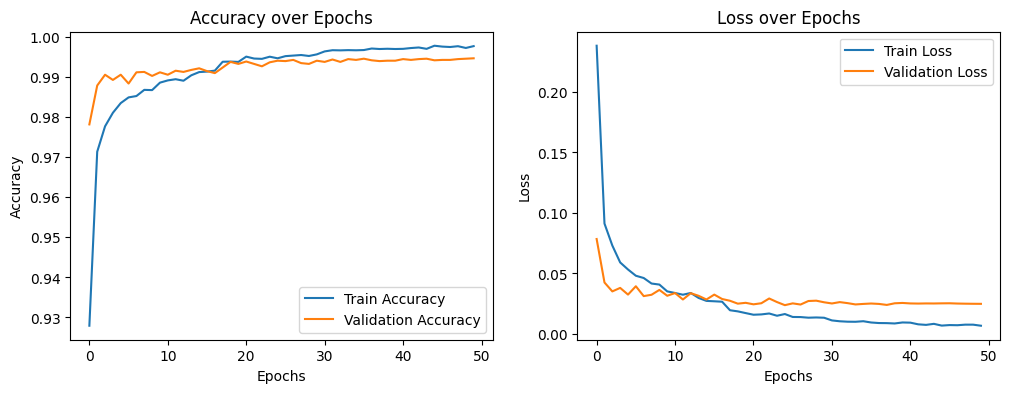

In [ ]:
# Vẽ đồ thị accuracy và loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


# **Bước 5: Lưu lịch sử và mô hình đã huấn luyện**

In [ ]:
import pickle
import pandas as pd # Import pandas for data manipulation

# Lưu mô hình
model.save('mnist_model_nhom10.keras')
model.save('drive/MyDrive/mnist_model_nhom10.keras')
#model.save('drive/MyDrive/mnist_model_nhom10.h5')
print("Đã lưu mô hình thành công.")

# Lưu nhật ký huấn luyện
def save_log(history, filename):
    df = pd.DataFrame(history.history)
    df.to_csv(filename, index=False)

save_log(history, 'training_log_nhom10.csv')
save_log(history, 'drive/MyDrive/training_log_nhom10.csv')

print("Nhật ký huấn luyện đã được lưu vào training_log.csv")

#
with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
with open('drive/MyDrive/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Đã lưu mô hình thành công.
Nhật ký huấn luyện đã được lưu vào training_log.csv


# **Bước 6: Tải lại mô hình đã lưu**

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import numpy as np
import seaborn as sns
import csv


# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chia tập train thành tập train và validation
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]


# Chuẩn hóa dữ liệu
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_val = x_val.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encoding cho nhãn
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Tải lại mô hình đã lưu
model = tf.keras.models.load_model('mnist_model_nhom10.keras')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        2

# **Bước 7: Đánh giá mô hình trên tập test**


In [8]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9952
Test Loss: 0.018416905775666237
Test Accuracy: 0.995199978351593


# **Bước 8: Tạo và vẽ confusion matrix**

313/313 [==============================] - 1s 3ms/step


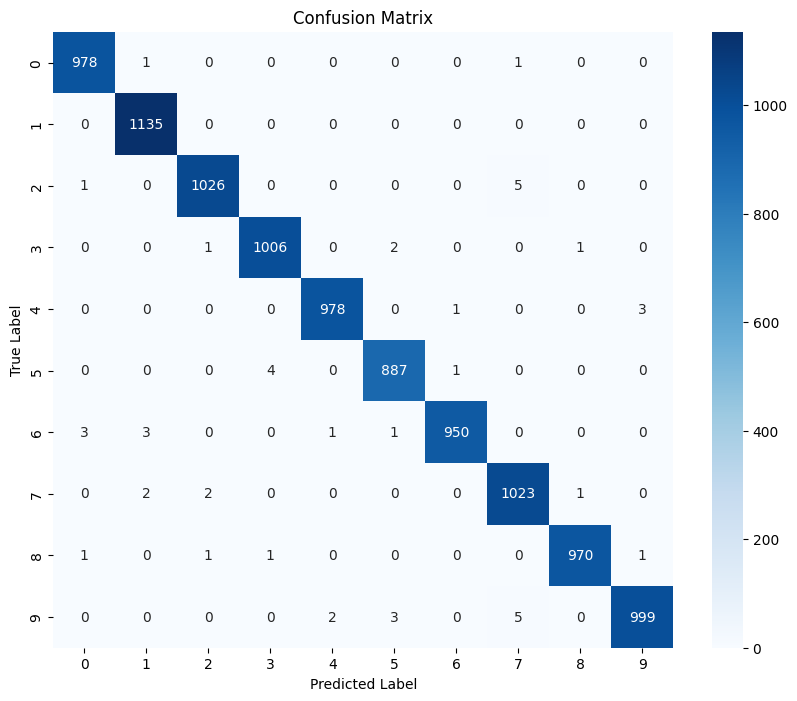

In [9]:
# Tạo confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Vẽ confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# **Bước 9: Tính toán precision, recall, f-score**

In [10]:
# Tính toán precision, recall, f-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Score: {fscore}")


Precision: 0.9952070831413433
Recall: 0.9952
F-Score: 0.995199554633956


# **Bước 10: Kiểm tra**

**Tải dữ liệu kiểm tra:**
[Google Drive](https://drive.google.com/file/d/1UwiZOOV8dFrqh8xM9mYkhG_Cm3N85ABI/view?usp=sharing)

**Cài đặt thư viện**

In [ ]:
!pip install streamlit
!pip install opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.2 MB/s eta 0:00:00


**Tải và cài đặt Cloudflare**

In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb


--2024-06-10 14:01:36--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2024.6.0/cloudflared-linux-amd64.deb [following]
--2024-06-10 14:01:36--  https://github.com/cloudflare/cloudflared/releases/download/2024.6.0/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/106867604/815f5a7a-92d2-471e-ab6f-3d14f7706cca?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240610%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20240610T140136Z&X-Amz-Expires=300&X-Amz-Signature=dd2f7d807cd71ab70f9febab2084d23f79b9fd3bf215727fa43538dfa2fe

**Tạo phần mềm**

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps

# Load mô hình
model = tf.keras.models.load_model('mnist_model_nhom10.keras')

st.title('Handwritten Digit Recognition')

def preprocess_image(image):
    # Convert the image to grayscale
    image = ImageOps.grayscale(image)
    # Resize the image to 28x28
    image = image.resize((28, 28))
    # Convert the image to a numpy array
    image = np.array(image)
    # Normalize pixel values
    image = image.astype('float32') / 255.0
    # Add a dimension to match the input shape of the model
    image = np.expand_dims(image, axis=(0, -1))
    return image

# Create a horizontal layout with two equal columns
col1, col2 = st.columns(2)

with col1:
    # Upload image in the first column
    uploaded_file = st.file_uploader("Choose an image...", type="jpg")

    if uploaded_file is not None:
        # Read and display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image', use_column_width=True)



with col2:
    if uploaded_file is not None:
        # Preprocess the image
        processed_image = preprocess_image(image)

        # Predict the label
        prediction = model.predict(processed_image)
        predicted_label = np.argmax(prediction, axis=1)

        st.markdown(f'**Predicted Digit: {predicted_label[0]}**')





Overwriting app.py


**Chạy ứng dụng Streamlit**
*Có thể mất một chút thời gian để có thể truy cập được*

In [ ]:
# Chạy ứng dụng Streamlit
!streamlit run app.py &>/dev/null&

# Tạo đường dẫn public bằng cloudflared
!cloudflared tunnel --url http://localhost:8501
